In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\amrut\Downloads\after_preprocess_data.csv', encoding = 'iso-8859-1')
data.sample(3)

,number_of_rooms,floor_on,total_floors,bedroom,pincode,balkon,terrasse,garten,Gaste-WC,Aufzug,wohung,construction_year,living_area_m2,transform_price
8899,2.0,1,4,1,13189,1,1,1,0,1,1,1910,4.204245,8.302299
7494,2.5,2,4,1,12357,1,1,1,0,0,1,1963,4.216710,8.178454
9100,5.0,0,2,3,15345,0,1,1,1,0,0,2019,5.141664,8.557737


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number_of_rooms    12743 non-null  float64
 1   floor_on           12743 non-null  int64  
 2   total_floors       12743 non-null  int64  
 3   bedroom            12743 non-null  int64  
 4   pincode            12743 non-null  int64  
 5   balkon             12743 non-null  int64  
 6   terrasse           12743 non-null  int64  
 7   garten             12743 non-null  int64  
 8   Gaste-WC           12743 non-null  int64  
 9   Aufzug             12743 non-null  int64  
 10  wohung             12743 non-null  int64  
 11  construction_year  12743 non-null  int64  
 12  living_area_m2     12743 non-null  float64
 13  transform_price    12743 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 1.4 MB


In [4]:
X = data.iloc[:, :-1]
y = data[['transform_price']]
X.shape, y.shape

((12743, 13), (12743, 1))

In [5]:
XX = X.to_numpy()
yy = y.to_numpy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)
X_train.shape, y_train.shape, X_test.shape

((12615, 13), (12615, 1), (128, 13))

In [7]:
tf.random.set_seed(20)
np.random.seed(1)
five_layer_model = tf.keras.models.Sequential()
five_layer_model.add(tf.keras.layers.Dense(600, activation='relu',input_dim=X.shape[1:][0]))
five_layer_model.add(tf.keras.layers.Dense(450,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(300,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(100,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(50,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(1))

five_layer_model.compile(loss='mse', optimizer='adam', 
                         metrics=['mae'])

In [8]:
history=five_layer_model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs=50, batch_size = 32)
predictions = five_layer_model.predict(X_test)


Epoch 1/50
395/395 [==============================] - 3s 7ms/step - loss: 1621.2147 - mae: 15.9392 - val_loss: 67.4196 - val_mae: 8.0036
Epoch 2/50
395/395 [==============================] - 3s 7ms/step - loss: 174.1481 - mae: 8.0283 - val_loss: 1844.8572 - val_mae: 41.2542
Epoch 3/50
395/395 [==============================] - 3s 8ms/step - loss: 83.6688 - mae: 5.4805 - val_loss: 2.4477 - val_mae: 1.4185
Epoch 4/50
395/395 [==============================] - 3s 7ms/step - loss: 6.7529 - mae: 1.7624 - val_loss: 7.4870 - val_mae: 2.5756
Epoch 5/50
395/395 [==============================] - 3s 7ms/step - loss: 6.3958 - mae: 1.6662 - val_loss: 3262.9353 - val_mae: 54.5953
Epoch 6/50
395/395 [==============================] - 3s 7ms/step - loss: 68.1320 - mae: 2.8500 - val_loss: 1.2512 - val_mae: 0.9447
Epoch 7/50
395/395 [==============================] - 3s 7ms/step - loss: 3.2927 - mae: 1.1868 - val_loss: 0.7573 - val_mae: 0.6063
Epoch 8/50
395/395 [==============================] - 3s 7m

In [9]:
five_layer_model.evaluate(X_train, y_train), five_layer_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1771 - mae: 0.2712


([0.1451958864927292, 0.26876363158226013],
 [0.17712491750717163, 0.2712053060531616])

In [10]:
predictions[:5], y_test.to_numpy()[:5]

(array([[8.584684 ],
        [8.283779 ],
        [8.577081 ],
        [7.7771664],
        [7.6519117]], dtype=float32),
 array([[8.54500289],
        [8.37047041],
        [8.69484149],
        [7.71760729],
        [7.7403941 ]]))

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.17712484631386854, 0.27120526816619495)

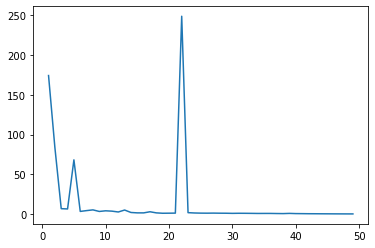

In [12]:
epochs = 50
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])

In [35]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(five_layer_model.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 12489
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[486392.78]], dtype=float32)

In [36]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(five_layer_model.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 10178
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[613561.06]], dtype=float32)

In [ ]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

In [ ]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

In [ ]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

In [ ]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

In [ ]:
epochs = 50
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])